In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score

In [164]:
train_data=pd.read_csv(r'C:\Users\User\Desktop\ms\loan prediction\train_ctrUa4K.csv')
test_data=pd.read_csv(r'C:\Users\User\Desktop\ms\loan prediction\test_lAUu6dG.csv')

In [165]:
train_data=pd.DataFrame(train_data)
test_data=pd.DataFrame(test_data)

In [166]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='most_frequent')
train_data1=imp.fit_transform(train_data)
test_data1=imp.fit_transform(test_data)

In [167]:
train_data1=pd.DataFrame(train_data1,columns=train_data.columns)
test_data1=pd.DataFrame(test_data1,columns=test_data.columns)

In [168]:
#drop loan id column
train_data1=train_data1.drop(columns=['Loan_ID'])
test_data1=test_data1.drop(columns=['Loan_ID'])

Y    422
N    192
Name: Loan_Status, dtype: int64

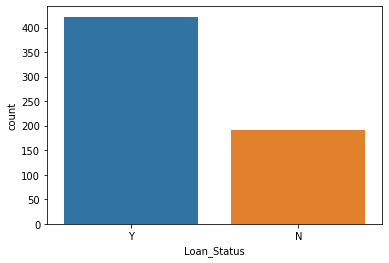

In [169]:
#visulization of target distribution
sns.countplot(train_data1["Loan_Status"])
train_data1["Loan_Status"].value_counts()

Male      347
Female     75
Name: Gender, dtype: int64

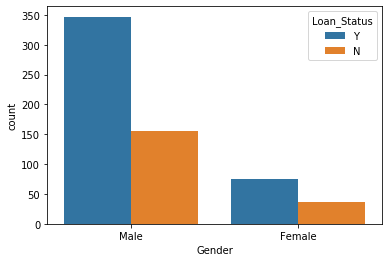

In [170]:
# see effect of Gender on loan stats
sns.countplot(x="Gender",hue="Loan_Status",data=train_data1)

train_data1.loc[train_data1["Loan_Status"]=='Y']['Gender'].value_counts()

In [171]:
train_data1['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [172]:
train_data1['Gender']=train_data1['Gender'].replace(['Male','Female'],[2,1])

test_data1['Gender']=test_data1['Gender'].replace(['Male','Female'],[2,1])

Yes    288
No     134
Name: Married, dtype: int64

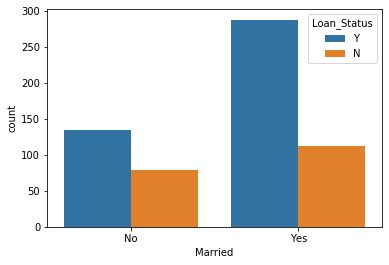

In [173]:
# see effect of married on loan stats
sns.countplot(x="Married",hue="Loan_Status",data=train_data1)

train_data1.loc[train_data1["Loan_Status"]=='Y']['Married'].value_counts()

In [174]:
train_data1['Married']=train_data1['Married'].replace(['Yes','No'],[2,1])

test_data1['Married']=test_data1['Married'].replace(['Yes','No'],[2,1])

0     247
2      76
1      66
3+     33
Name: Dependents, dtype: int64

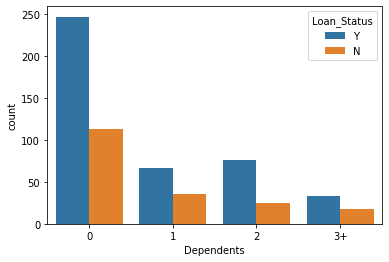

In [175]:
# see effect of Dependents on loan stats
sns.countplot(x="Dependents",hue="Loan_Status",data=train_data1)

train_data1.loc[train_data1["Loan_Status"]=='Y']['Dependents'].value_counts()

In [176]:
train_data1['Dependents']=train_data1['Dependents'].replace(['0','2','1','3+'],[3,4,2,1])

test_data1['Dependents']=test_data1['Dependents'].replace(['0','2','1','3+'],[3,4,2,1])

Graduate        340
Not Graduate     82
Name: Education, dtype: int64

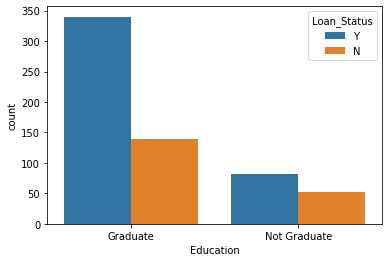

In [177]:
# see effect of Education on loan stats
sns.countplot(x="Education",hue="Loan_Status",data=train_data1)

train_data1.loc[train_data1["Loan_Status"]=='Y']['Education'].value_counts()

In [178]:
train_data1['Education']=train_data1['Education'].replace(['Graduate','Not Graduate'],[2,1])

test_data1['Education']=test_data1['Education'].replace(['Graduate','Not Graduate'],[2,1])

No     366
Yes     56
Name: Self_Employed, dtype: int64

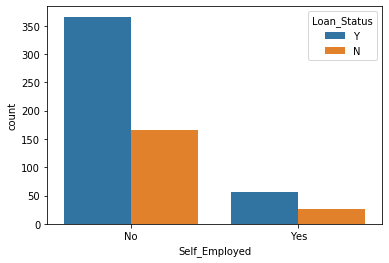

In [179]:
# see effect of Self_Employed on loan stats
sns.countplot(x="Self_Employed",hue="Loan_Status",data=train_data1)

train_data1.loc[train_data1["Loan_Status"]=='Y']['Self_Employed'].value_counts()

In [180]:
train_data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [181]:
train_data1['Self_Employed']=train_data1['Self_Employed'].replace(['No','Yes'],[2,1])

test_data1['Self_Employed']=test_data1['Self_Employed'].replace(['No','Yes'],[2,1])

360.0    367
180.0     29
300.0      8
480.0      6
120.0      3
240.0      3
84.0       3
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

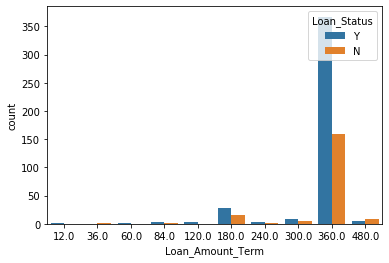

In [182]:
# see effect of Loan_Amount_Term on loan stats
sns.countplot(x="Loan_Amount_Term",hue="Loan_Status",data=train_data1)

train_data1.loc[train_data1["Loan_Status"]=='Y']['Loan_Amount_Term'].value_counts()

In [183]:
train_data1['Loan_Amount_Term']=train_data1['Loan_Amount_Term'].replace([360.0,180.0,480.0,300.0,84.0,240.0,120.0,36.0,60.0,12.0],[52,4,3,3,2,2,2,1,1,1])

test_data1['Loan_Amount_Term']=test_data1['Loan_Amount_Term'].replace([360.0,180.0,480.0,300.0,84.0,240.0,120.0,36.0,60.0,12.0],[5,3,4,3,2,2,2,1,1,1])

1.0    415
0.0      7
Name: Credit_History, dtype: int64

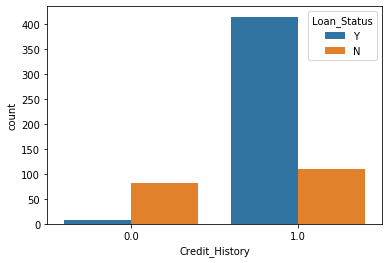

In [184]:
# see effect of Credit_History on loan stats
sns.countplot(x="Credit_History",hue="Loan_Status",data=train_data1)

train_data1.loc[train_data1["Loan_Status"]=='Y']['Credit_History'].value_counts()

In [185]:
train_data1['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

Semiurban    179
Urban        133
Rural        110
Name: Property_Area, dtype: int64

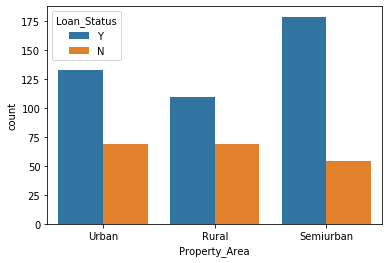

In [186]:
# see effect of Property_Area on loan stats
sns.countplot(x="Property_Area",hue="Loan_Status",data=train_data1)

train_data1.loc[train_data1["Loan_Status"]=='Y']['Property_Area'].value_counts()

In [187]:
train_data1['Property_Area']=train_data1['Property_Area'].replace(['Semiurban','Urban','Rural'],[3,2,1])
test_data1['Property_Area']=test_data1['Property_Area'].replace(['Semiurban','Urban','Rural'],[3,2,1])

In [188]:
# change data typr of train_data
train_data1["ApplicantIncome"]=train_data1["ApplicantIncome"].astype(int)
train_data1["CoapplicantIncome"]=train_data1["CoapplicantIncome"].astype(int)
train_data1["LoanAmount"]=train_data1["LoanAmount"].astype(int)
train_data1["Credit_History"]=train_data1["Credit_History"].astype(int)

In [189]:
# change data typr of test_data
test_data1["ApplicantIncome"]=test_data1["ApplicantIncome"].astype(int)
test_data1["CoapplicantIncome"]=test_data1["CoapplicantIncome"].astype(int)
test_data1["LoanAmount"]=test_data1["LoanAmount"].astype(int)
test_data1["Credit_History"]=test_data1["Credit_History"].astype(int)

In [190]:
# bulid a new feature of total income
train_data1["Total_Income"]=train_data1["ApplicantIncome"]+train_data1["CoapplicantIncome"]

test_data1["Total_Income"]=test_data1["ApplicantIncome"]+test_data1["CoapplicantIncome"]

In [191]:
# drop ApplicantIncome and CoapplicantIncome
train_data2=train_data1.drop(columns=['ApplicantIncome','CoapplicantIncome'])

test_data2=test_data1.drop(columns=['ApplicantIncome','CoapplicantIncome'])

In [192]:
# bulid a new feature of Income_Ratio
train_data2["Income_Ratio"]=train_data2["Total_Income"]/train_data2["LoanAmount"]

test_data2["Income_Ratio"]=test_data2["Total_Income"]/test_data2["LoanAmount"]

In [258]:
y=train_data2.iloc[:,9]
x=train_data2.drop(columns=["Loan_Status"])

In [259]:
selector = RFE(classifier, n_features_to_select=9, step=1)
selector = selector.fit(x, y)
xb=x.loc[:,selector.support_]
test_data3=test_data2.loc[:,selector.support_]

In [309]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=6)
xl=lda.fit(xb, y).transform(xb)
test_data4=lda.transform(test_data3)

C:\Users\User\anaconda4\lib\site-packages\sklearn\discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(9, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
C:\Users\User\anaconda4\lib\site-packages\sklearn\discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [310]:
X_train, X_test, y_train, y_test = train_test_split(xl, y, test_size=0.2)

In [311]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators =250,max_depth=8, min_samples_split=5)
classifier.fit(X_train,y_train)
pred1=classifier.predict(X_test)

In [312]:

print(confusion_matrix(y_test, pred1))
print(accuracy_score(y_test,pred1))
print(f1_score(y_test,pred1,average='weighted'))

[[16 17]
 [ 2 88]]
0.8455284552845529
0.8287532649082147


In [313]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0,max_depth=8, min_samples_split=2)
clf.fit(X_train,y_train)
pred1=clf.predict(X_test)
print(confusion_matrix(y_test, pred1))
print(accuracy_score(y_test,pred1))
print(f1_score(y_test,pred1,average='weighted'))

[[17 16]
 [ 5 85]]
0.8292682926829268
0.8171114800153236


In [314]:
from sklearn.ensemble import AdaBoostClassifier
adb= AdaBoostClassifier(n_estimators=50, random_state=0)
adb.fit(X_train,y_train)
pred1=adb.predict(X_test)
print(confusion_matrix(y_test, pred1))
print(accuracy_score(y_test,pred1))
print(f1_score(y_test,pred1,average='weighted'))

[[18 15]
 [ 2 88]]
0.8617886178861789
0.849492952843303


In [315]:
from sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier(random_state=0,n_estimators=50)
gbc.fit(X_train,y_train)
pred1=gbc.predict(X_test)
print(confusion_matrix(y_test, pred1))
print(accuracy_score(y_test,pred1))
print(f1_score(y_test,pred1,average='weighted'))

[[16 17]
 [ 3 87]]
0.8373983739837398
0.8213767625384423


In [316]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
pred1=nb.predict(X_test)
print(confusion_matrix(y_test, pred1))
print(accuracy_score(y_test,pred1))
print(f1_score(y_test,pred1,average='weighted'))

[[15 18]
 [ 0 90]]
0.8536585365853658
0.8328713968957872


In [366]:
from sklearn.ensemble import VotingClassifier
estim=[('classifier',classifier),('clf',clf),('adb',adb),('gbc',gbc),('nb',nb)]
vt=VotingClassifier(estimators=estim,voting="soft")
vt.fit(X_train,y_train)
pred1=vt.predict(X_test)
print(confusion_matrix(y_test, pred1))
print(accuracy_score(y_test,pred1))
print(f1_score(y_test,pred1,average='weighted'))

[[16 17]
 [ 3 87]]
0.8373983739837398
0.8213767625384423


In [367]:
pred_l=vt.predict(test_data4)

In [368]:
pred_sub=pd.DataFrame(pred_l,columns=["Loan_Status"])

In [369]:
final_data=pd.DataFrame(pd.concat([test_data.iloc[:,0],pred_sub],axis=1))

In [370]:
final_data.to_csv(r'C:\Users\User\Downloads\loan_pred.csv',index=False) 

In [371]:
final_data

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y
